In [101]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.integrate import dblquad
from scipy.integrate import quad
from math import *

# Paramètres

In [102]:
L = 4 #time horizon
X_0 = 100 # initial price
K = 85 #strike
sigma = 0.2 # volatility

In [103]:
#  discrétization points: method 1: based on the quantiles of the normal law

nb_quantization_points = 30

def quantization_points(t):
        

        percentiles = np.linspace(0, 100, nb_quantization_points + 2)[1:-1]  
        

        c = X_0*np.exp(- (sigma**2) * (t) / 2)*np.exp(sigma*norm.ppf(percentiles / 100.0, loc=0, scale=sqrt(t)))
        return (c)





In [104]:
# discrétization points: method 2: directly computed



def quantization_points2(t):
        

        percentiles = np.linspace(0, 100, nb_quantization_points + 2)[1:-1]  
        

        c = lognorm.ppf(percentiles / 100.0, s=sigma*sqrt(t),loc=0, scale=X_0*np.exp(-sigma**2*t/2))
        return (c)


In [105]:
for t in range(1,L+1):
    print(quantization_points(t))
    print(quantization_points2(t))



[ 67.72469797  72.35498516  75.57605493  78.17693571  80.42591584
  82.44993942  84.32045047  86.0824367   87.76665712  89.39558339
  90.98660646  92.55392083  94.10972038  95.66501953  97.23027015
  98.81587675 100.43268103 102.09247623 103.80861562 105.59679898
 107.47616411 109.47089369 111.61271405 113.94500786 116.53003579
 119.46266687 122.89934753 127.12881613 132.78828502 141.86692122]
[ 67.72469797  72.35498516  75.57605493  78.17693571  80.42591584
  82.44993942  84.32045047  86.0824367   87.76665712  89.39558339
  90.98660646  92.55392083  94.10972038  95.66501953  97.23027015
  98.81587675 100.43268103 102.09247623 103.80861562 105.59679898
 107.47616411 109.47089369 111.61271405 113.94500786 116.53003579
 119.46266687 122.89934753 127.12881613 132.78828502 141.86692122]
[ 56.95766072  62.54179074  66.51525117  69.77539298  72.63094338
  75.22932534  77.65425398  79.95897168  82.1803175   84.34560147
  86.47634025  88.59047377  90.70379373  92.83094849  94.98622517
  97.184

In [106]:
# log normal law:
def log_normale(x,moy,ecart):
    return 1/(x*np.sqrt(2*pi)*ecart)*np.exp( (- ( (np.log(x)-moy)  /ecart)**2 ) / 2 )




In [107]:

#law of St

def integrandf2(y,t):
    return log_normale(y,-sigma**2*t/2+np.log(X_0),sigma*np.sqrt(t))


#law of St+1/St multiplied by y (multiply by y is necessary for the change of variable)

def integrandf1(x,y,t):
    return y*log_normale(x,-sigma**2/2,sigma)*integrandf2(y,t)


In [108]:
#computation of the integrale to calculate pi(ij)=p(ij)/pi later

def integrale_MC3(X,Y,t):
    
  result1,_ = dblquad(lambda y, x: integrandf1(x, y,t), 
                                   Y[0],  
                                   Y[1], 
                                   lambda y: X[0]/y,  
                                   lambda y: X[1]/y,  
                                   
                                        
                                  )
  result2,_ = quad(integrandf2,Y[0],Y[1],args=(t,)) 


                                  
  return result1/result2


<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Moyal\AppData\Local\Temp\ipykernel_3380\1567665544.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(s_values, pdf_values(t), label=f'Log-Normal PDF de $S(t)$\n$, $\sigma={sigma}$, $t={t}$')
C:\Users\Moyal\AppData\Local\Temp\ipykernel_3380\1567665544.py:25: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(s_values, pdf_values2(t), label=f'Log-Normal2 PDF de $S(t)$\n$, $\sigma={sigma}$, $t={t}$')
C:\Users\Moyal\AppData\Local\Temp\ipykernel_3380\3723841300.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(x*np.sqrt(2*pi)*ecart)*np.exp( (- ( (np.log(x)-moy)  /ecart)**2 ) / 2 )
C:\Users\Moyal\AppData\Local\Temp\ipykernel_3380\3723841300.py:3: RuntimeWarning: divide by zero encountered in log
  return 1/(x*np.sqrt(2*pi)*ecart)*np.exp( (

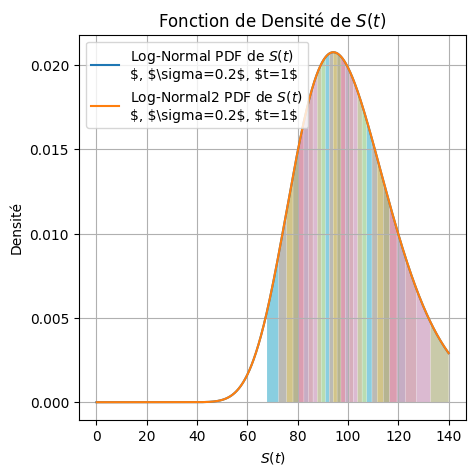

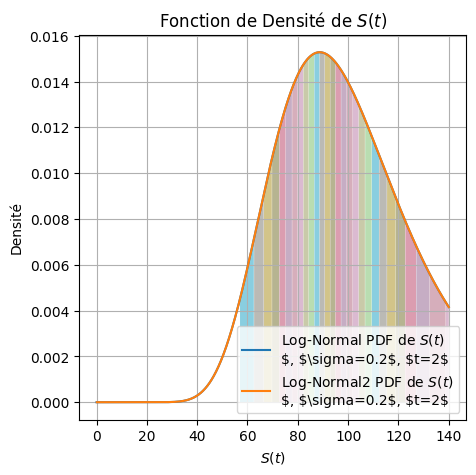

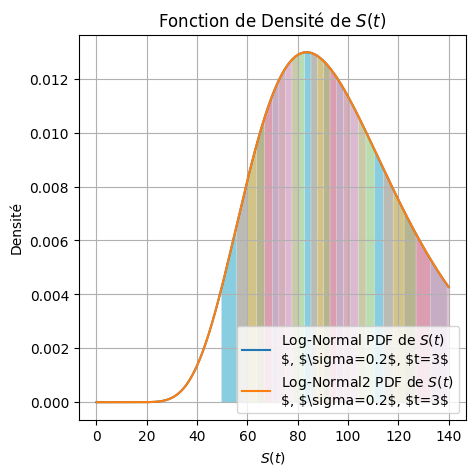

In [109]:


#plot

s_values = np.linspace(00, 140, 1000)  

# Calculus of log-normale: method 1 (directly with the library)
def pdf_values(t):
    pdf_values = lognorm.pdf(s_values, s=sigma*np.sqrt(t), loc=0, scale=X_0*np.exp(-sigma**2*t/2))
    return pdf_values


# Calculus of log-normale: method 2 (function created before)
def pdf_values2(t):
    pdf_values2 = []
    for value in s_values:
        pdf_values2.append(integrandf2(value,t))
    return pdf_values2


for t in range(1,L):
    plt.figure(figsize=(5, 5))
    plt.plot(s_values, pdf_values(t), label=f'Log-Normal PDF de $S(t)$\n$, $\sigma={sigma}$, $t={t}$')
    for i in range(len(quantization_points(t))-1):
        plt.fill_between ( s_values,pdf_values(t), where=  (  (s_values >= quantization_points(t)[i]) & ( s_values <= quantization_points(t)[i+1]) )  , alpha=0.3)  

    plt.plot(s_values, pdf_values2(t), label=f'Log-Normal2 PDF de $S(t)$\n$, $\sigma={sigma}$, $t={t}$')
    for i in range(len(quantization_points(t))-1):
        plt.fill_between ( s_values,pdf_values(t), where=  (  (s_values >= quantization_points(t)[i]) & ( s_values <= quantization_points(t)[i+1]) )  , alpha=0.3)  
    plt.title('Fonction de Densité de $S(t)$')
    plt.xlabel('$S(t)$')
    plt.ylabel('Densité')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    


In [110]:

# Initialisation
transition_matrix = np.zeros((nb_quantization_points, nb_quantization_points,L))

# Calculus

for t in range(1,L):
    for i in range(nb_quantization_points):
        if i == 0:
            ai = quantization_points(t+1)[i]/2
            bi = (quantization_points(t+1)[i] + quantization_points(t+1)[i + 1]) / 2
        elif i == nb_quantization_points - 1:
            ai = (quantization_points(t+1)[ i - 1] + quantization_points (t+1)  [i] )/ 2
            bi = np.inf
        else:
            ai = (quantization_points (t+1)[ i - 1] + quantization_points (t+1)   [ i]) / 2
            bi = (quantization_points  (t+1)[ i] + quantization_points  (t+1)  [ i + 1]) / 2
                    
        for j in range(nb_quantization_points):
            if j == 0:
                aj = quantization_points(t)[i]/2
                bj = (quantization_points (t)  [ j] + quantization_points   (t)  [ j + 1]) / 2  
            elif j == nb_quantization_points - 1:
                aj = (quantization_points  (t)  [ j - 1] + quantization_points   (t)   [ j]) / 2 *np.exp(-(sigma**2)/2)
                bj = np.inf
            else:
                aj = (quantization_points    (t)    [ j - 1] + quantization_points    (t)      [ j]) / 2     
                bj = (quantization_points    (t)    [ j] + quantization_points    (t)        [ j + 1]) / 2   
            


            transition_matrix[j, i, t] = integrale_MC3([ai,bi],[aj,bj], t  )
            #remind: pji: probability to go from j to i
          
            
# The transition matrix from t=0 to t=1 is a particular case(column), computed specifically 
transition_matrix_0=np.zeros((nb_quantization_points,1))
for i in range(nb_quantization_points):
    if i == 0:
        ai = quantization_points(1)[i]/2
        bi = (quantization_points(1)[i] + quantization_points(1)[i + 1]) / 2
    elif i == nb_quantization_points - 1:
        ai = (quantization_points(1)[ i - 1] + quantization_points (1)  [i] )/ 2
        bi = np.inf
    else:
        ai = (quantization_points (1)[ i - 1] + quantization_points (1)   [ i]) / 2
        bi = (quantization_points  (1)[ i] + quantization_points  (1)  [ i + 1]) / 2
    aif=(np.log(ai/X_0)-sigma**2/2)/sigma
    bif=(np.log(bi/X_0)-sigma**2/2)/sigma


    transition_matrix_0[i,0]=norm.cdf(bif)-norm.cdf(aif)  






In [112]:


#  payoff  :
def payoff(S, K):
    return np.maximum(S - K , 0)

# Parameters :
Nk = nb_quantization_points   

V_hat = np.zeros(( L+1, Nk))  


# Initialisation :
V_hat[L, :] = payoff(  quantization_points(L)   , K)

# Backward recursion :
for k in range(L-1,0,-1):  # from L-1 to 1
    for i in range(Nk):
        continuation_value = 0
        for j in range(Nk):
            continuation_value += transition_matrix[i, j , k] * V_hat[ k+1, j]
        V_hat[ k, i] = np.maximum(payoff(quantization_points  (k)  [i], K), continuation_value)

#last step: from t=1 to t=0
V_hat0 = np.zeros((1, 1))
continuation_value = 0
for j in range(Nk):    
    continuation_value += transition_matrix_0[j,0] * V_hat[1, j]
V_hat0[ 0, 0] = np.maximum(payoff(X_0, K), continuation_value)


print("La valeur estimée de l'option est:",V_hat0[ 0, 0])



La valeur estimée de l'option est: 19.96157022221045
